In [3]:
from modules import get_path_movement, get_primary_location, get_primary_movement_keybinds, get_primary_location_keybinds, get_usability, data_pandas, count_usability
from modules import get_splits, print_data_Frame
from moduleDeep import conver_tensor, get_loaders, BasicNeuralModel, ResNet, get_basicNN_model, load_model, print_accuracy, get_resNet_model, reshape_x, compare_model
from moduleDeep import predict_all, plot_confusion_deep
import matplotlib.pyplot as plt

# Experiment 6

In [4]:
usability = get_usability()
pathMovement = get_primary_location()
label_keys = get_primary_location_keybinds()

### Load in the data

In [5]:
X_train, X_test, y_train, y_test = get_splits(6)
X_train, X_test = reshape_x(X_train, X_test)

## Data info

number of each usability:  {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333}


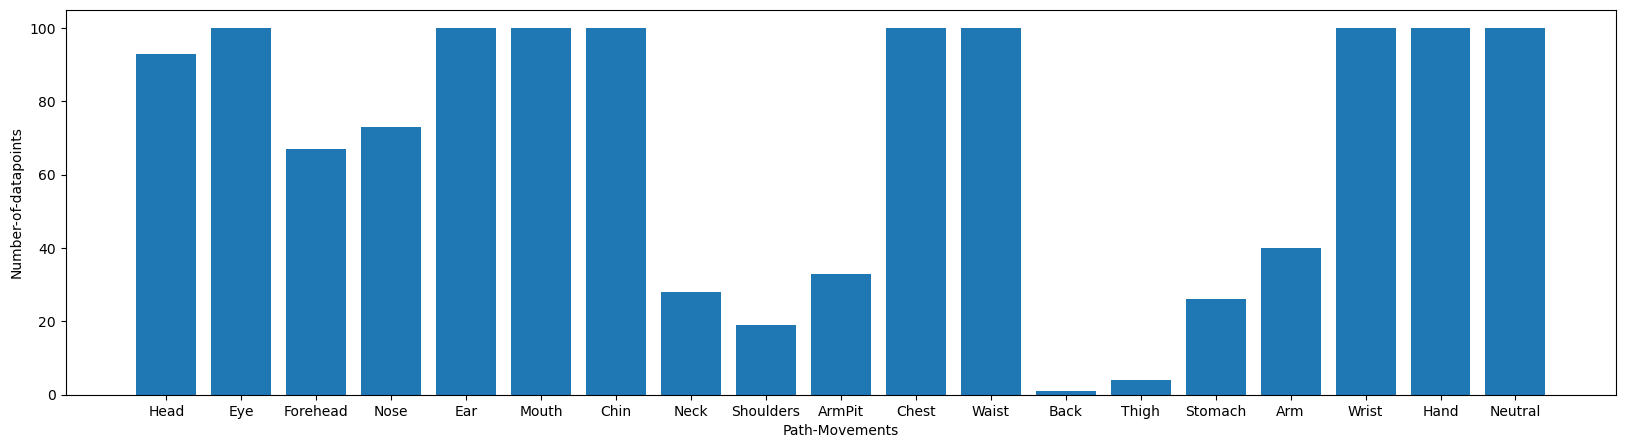

,Class,Count
0,Head,93
1,Eye,100
2,Forehead,67
3,Nose,73
4,Ear,100
5,Mouth,100
6,Chin,100
7,Neck,28
8,Shoulders,19
9,ArmPit,33


In [7]:
# plot the data
class_counts_df = data_pandas(y_train, label_keys, 1)
print("number of each usability: ", count_usability(usability))
plt.figure(figsize = (20, 5))
plt.bar(class_counts_df['Class'], class_counts_df['Count'])
plt.xlabel("Path-Movements")
plt.ylabel("Number-of-datapoints")
plt.show()
class_counts_df

### Dataloader

In [6]:
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = conver_tensor(X_train, X_test, y_train, y_test)
train_loader, test_loader = get_loaders(X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)

### Model Loading

In [7]:
basicnn = get_basicNN_model(len(label_keys))
basicnn : BasicNeuralModel
load_model(basicnn, './experiment6/BasicNeuralModel.pth')

In [8]:
print(basicnn)

BasicNeuralModel(
  (fc1): Linear(in_features=3960, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=19, bias=True)
  (relu): ReLU()
)


### Neural Net Model Accuracy

In [18]:
print_accuracy(basicnn, label_keys, test_loader)

Overall Test Accuracy: 0.1708
Class 0 Accuracy: Nan
Class 1 Accuracy: 0.1579
Class 2 Accuracy: Nan
Class 3 Accuracy: Nan
Class 4 Accuracy: 0.1984
Class 5 Accuracy: 0.1905
Class 6 Accuracy: 0.2136
Class 7 Accuracy: Nan
Class 8 Accuracy: Nan
Class 9 Accuracy: Nan
Class 10 Accuracy: 0.2667
Class 11 Accuracy: 0.0000
Class 12 Accuracy: Nan
Class 13 Accuracy: Nan
Class 14 Accuracy: Nan
Class 15 Accuracy: Nan
Class 16 Accuracy: 0.5385
Class 17 Accuracy: 0.2612
Class 18 Accuracy: 0.1229


## Neural Network confusion Matrix

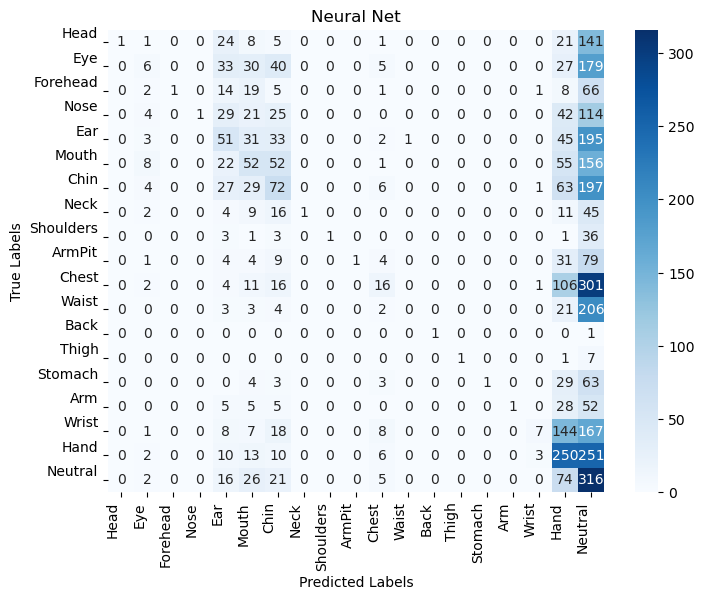

In [8]:
y_pred, y_true = predict_all(test_loader, basicnn)
y_pred, y_true = y_pred.cpu().numpy(), y_true.cpu().numpy()
plot_confusion_deep(y_pred, y_true, label_keys, 'Neural Net', len(label_keys))

### Model Loading

In [10]:
resNet = get_resNet_model(len(label_keys))
resNet : ResNet
load_model(resNet, './experiment6/ResNetModel.pth')

### ResNet 18 Model Accuracy

In [20]:
print_accuracy(resNet, label_keys, test_loader)

Overall Test Accuracy: 0.2274
Class 0 Accuracy: Nan
Class 1 Accuracy: 0.1842
Class 2 Accuracy: Nan
Class 3 Accuracy: Nan
Class 4 Accuracy: 0.2257
Class 5 Accuracy: 0.2711
Class 6 Accuracy: 0.2315
Class 7 Accuracy: Nan
Class 8 Accuracy: Nan
Class 9 Accuracy: Nan
Class 10 Accuracy: 0.2167
Class 11 Accuracy: 1.0000
Class 12 Accuracy: Nan
Class 13 Accuracy: Nan
Class 14 Accuracy: Nan
Class 15 Accuracy: Nan
Class 16 Accuracy: 0.5385
Class 17 Accuracy: 0.3563
Class 18 Accuracy: 0.1734


## ResNet 18 confusion Matrix

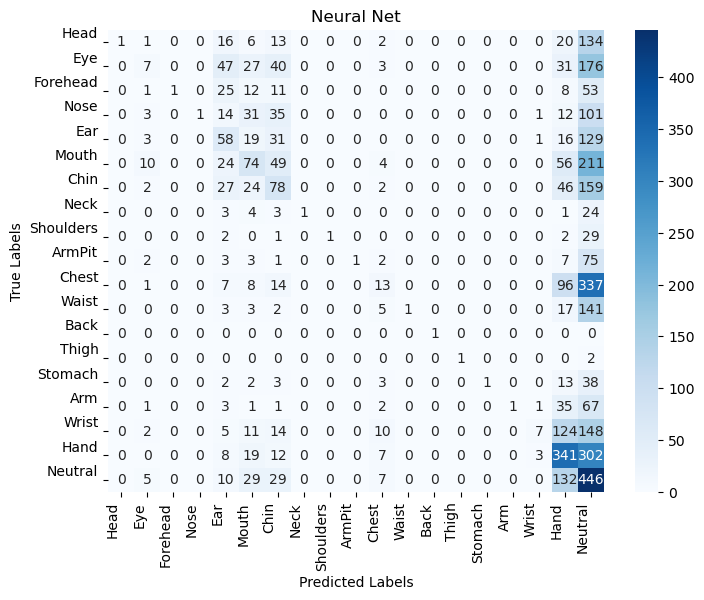

In [21]:
y_pred, y_true = predict_all(test_loader, resNet)
y_pred, y_true = y_pred.cpu().numpy(), y_true.cpu().numpy()
plot_confusion_deep(y_pred, y_true, label_keys, 'Neural Net', len(label_keys))

## Comparison

In [22]:
df = compare_model(basicnn, resNet, test_loader, train_loader)
print_data_Frame(df)

|    | Model            |   Training Accuracy |   Test Accuracy |
|---:|:-----------------|--------------------:|----------------:|
|  0 | Basic Neural Net |                   1 |        0.170807 |
|  1 | ResNet18         |                   1 |        0.227374 |


# Average time to predict

In [11]:
import time
modelNames = ['Basic Neural Net', 'ResNet18']
models = [basicnn, resNet]
for i, model in enumerate(models):
    start = time.time()
    model(X_test_tensor)
    end = time.time()
    total_time = (end - start)
    avg_time = (end - start)/ len(X_test_tensor)
    print(modelNames[i] + ' average taken : ' + "{:.10f}".format(avg_time * 1000))

Basic Neural Net average taken : 0.2754694504
ResNet18 average taken : 0.5833557885


# Experiment 7

In [23]:
usability = get_usability()
pathMovement = get_path_movement()
label_keys = get_primary_movement_keybinds()
label_keys.pop('Unknown\n')
label_keys.pop('Local Movement\n')

10

### Load in the data

In [24]:
X_train, X_test, y_train, y_test = get_splits(7)
X_train, X_test = reshape_x(X_train, X_test)

## Data info

number of each usability:  {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333}


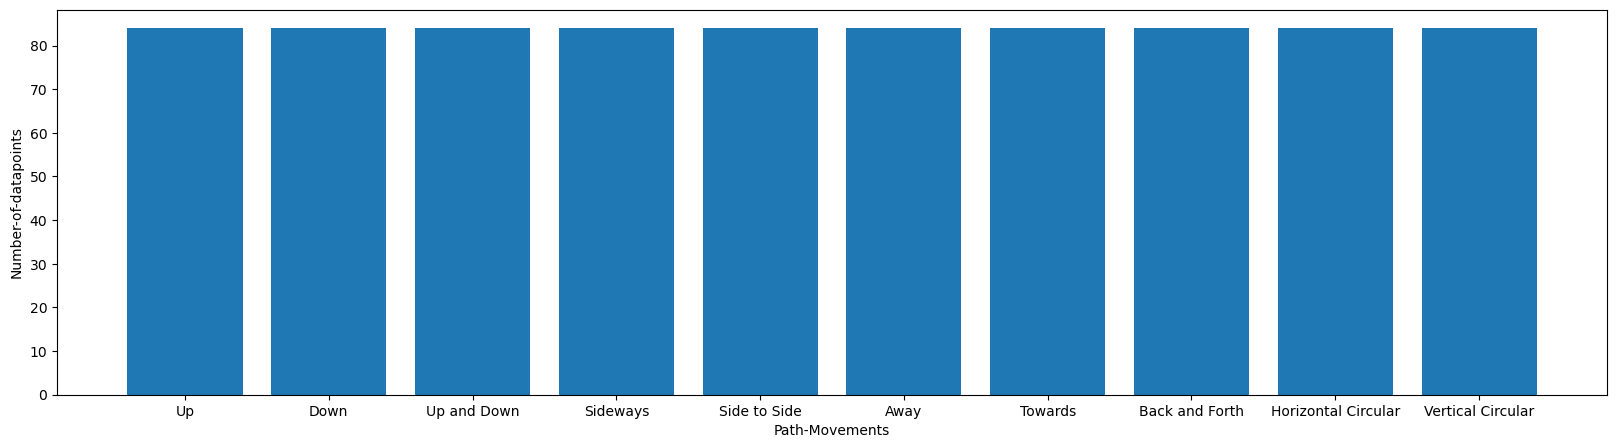

,Class,Count
0,Up,84
1,Down,84
2,Up and Down,84
3,Sideways,84
4,Side to Side,84
5,Away,84
6,Towards,84
7,Back and Forth,84
8,Horizontal Circular,84
9,Vertical Circular,84


In [25]:
# plot the data
class_counts_df = data_pandas(y_train, label_keys, 1)
print("number of each usability: ", count_usability(usability))
plt.figure(figsize = (20, 5))
plt.bar(class_counts_df['Class'], class_counts_df['Count'])
plt.xlabel("Path-Movements")
plt.ylabel("Number-of-datapoints")
plt.show()
class_counts_df

### Dataloader

In [26]:
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = conver_tensor(X_train, X_test, y_train, y_test)
train_loader, test_loader = get_loaders(X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)

### Model Loading

In [27]:
basicnn = get_basicNN_model(len(label_keys))
basicnn : BasicNeuralModel
load_model(basicnn, './experiment7/BasicNeuralModel.pth')

### Neural Net Model Accuracy

In [28]:
print_accuracy(basicnn, label_keys, test_loader)

Overall Test Accuracy: 0.1274
Class 0 Accuracy: 0.0685
Class 1 Accuracy: 0.1598
Class 2 Accuracy: 0.1370
Class 3 Accuracy: 0.0814
Class 4 Accuracy: 0.2319
Class 5 Accuracy: 0.0570
Class 6 Accuracy: 0.0600
Class 7 Accuracy: Nan
Class 8 Accuracy: 0.1111
Class 9 Accuracy: 0.1923


## Neural Network confusion Matrix

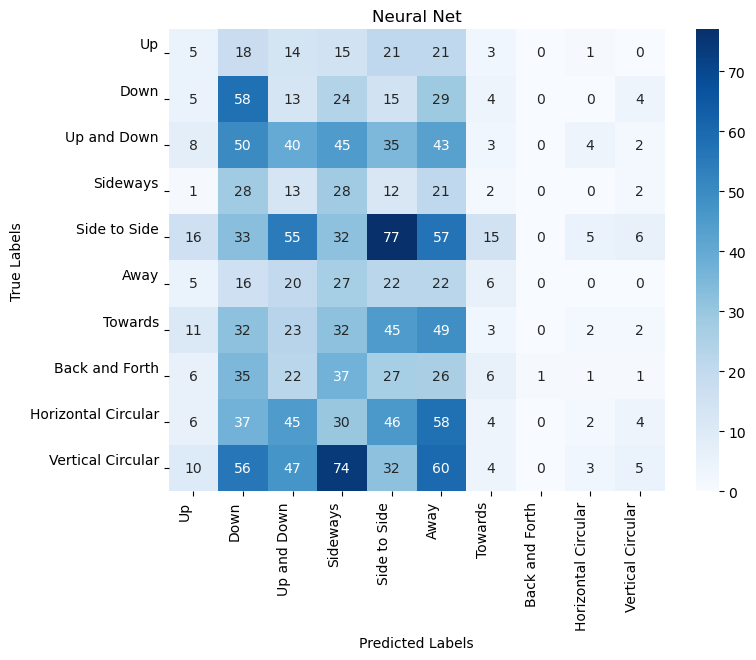

In [29]:
y_pred, y_true = predict_all(test_loader, basicnn)
y_pred, y_true = y_pred.cpu().numpy(), y_true.cpu().numpy()
plot_confusion_deep(y_pred, y_true, label_keys, 'Neural Net', len(label_keys))

### Model Loading

In [30]:
resNet = get_resNet_model(len(label_keys))
resNet : ResNet
load_model(resNet, './experiment7/ResNetModel.pth')

### ResNet 18 Model Accuracy

In [31]:
print_accuracy(resNet, label_keys, test_loader)

Overall Test Accuracy: 0.2277
Class 0 Accuracy: 0.1781
Class 1 Accuracy: 0.3388
Class 2 Accuracy: 0.1336
Class 3 Accuracy: 0.2326
Class 4 Accuracy: 0.2259
Class 5 Accuracy: 0.1943
Class 6 Accuracy: 0.2800
Class 7 Accuracy: Nan
Class 8 Accuracy: 0.2778
Class 9 Accuracy: 0.1923


## ResNet 18 confusion Matrix

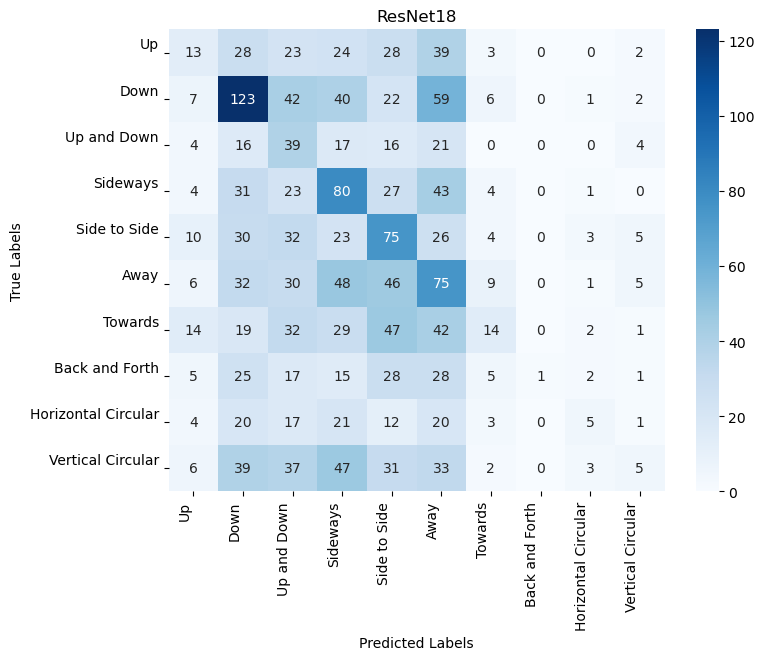

In [32]:
y_pred, y_true = predict_all(test_loader, resNet)
y_pred, y_true = y_pred.cpu().numpy(), y_true.cpu().numpy()
plot_confusion_deep(y_pred, y_true, label_keys, 'ResNet18', len(label_keys))

## Comparison

In [33]:
df = compare_model(basicnn, resNet, test_loader, train_loader)
print_data_Frame(df)

|    | Model            |   Training Accuracy |   Test Accuracy |
|---:|:-----------------|--------------------:|----------------:|
|  0 | Basic Neural Net |            0.528571 |        0.127389 |
|  1 | ResNet18         |            1        |        0.227707 |


: 